# Install Packages
- `torch-scatter`
- `torch-sparse`

In [3]:
# Install required packages.
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Visualization Function
This code defines two functions for visualizing graphs and embeddings. The purpose of each function is as follows:

1. **`visualizeGraph(G, color)` function**:
   - Takes as input a graph `G` and a `color` parameter specifying the colors of the nodes.
   - Uses `nx.spring_layout` to compute the layout of the graph and `nx.draw_networkx` to visualize the graph.
   - The visualized graph does not show node labels, and node colors are determined based on the `color` parameter using the `Set2` colormap.

2. **`visualizeEmbedding(h, color, epoch=None, loss=None)` function**:
   - Takes as input an embedding tensor `h`, a `color` parameter, and optional `epoch` and `loss` values.
   - Converts the embedding tensor `h` to a NumPy array and uses `plt.scatter` to visualize it as points in a 2D plane.
   - If `epoch` and `loss` values are provided, they are displayed as the x-axis label of the plot.
   - The visualized embedding uses the specified `Set2` colormap for node colors.

This code is primarily used to visualize graph data and the embedding results of neural networks. Through visualization, one can easily understand the structure of the graph and the distribution of the embeddings.

--------------------------------------------------------------------------------
이 코드는 그래프와 임베딩을 시각화하는 두 가지 함수를 정의한 것이다. 각 함수의 목적은 다음과 같다:

1. **`visualizeGraph(G, color)` 함수**:
   - 그래프 `G`와 노드의 색상을 지정하는 `color` 매개변수를 입력으로 받는다.
   - `nx.spring_layout`을 사용하여 그래프의 레이아웃을 계산하고, `nx.draw_networkx`를 사용하여 그래프를 시각화한다.
   - 시각화된 그래프는 노드의 레이블을 표시하지 않으며, 노드의 색상은 `color` 매개변수를 기반으로 지정된 컬러맵(`Set2`)을 사용한다.

2. **`visualizeEmbedding(h, color, epoch=None, loss=None)` 함수**:
   - 임베딩 텐서 `h`, 색상을 지정하는 `color` 매개변수, 선택적인 `epoch` 및 `loss` 값을 입력으로 받는다.
   - 임베딩 텐서 `h`를 NumPy 배열로 변환하고, `plt.scatter`를 사용하여 2D 평면에 점으로 시각화한다.
   - `epoch`와 `loss` 값이 제공되면, 플롯의 x축 레이블에 해당 정보를 표시한다.
   - 시각화된 임베딩은 지정된 `Set2` 컬러맵을 사용하여 노드의 색상을 표시한다.

이 코드는 주로 그래프 데이터를 시각화하고, 신경망의 임베딩 결과를 시각화하는 데 사용된다. 시각화를 통해 그래프의 구조와 임베딩의 분포를 쉽게 이해할 수 있다.


In [4]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

def visualizeGraph(G, color):
  plt.figure(figsize=(7,7))
  plt.xticks([])
  plt.yticks([])
  nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                   node_color=color, cmap="Set2")
  plt.show()

def visualizeEmbedding(h, color, epoch=None, loss=None):
  plt.figure(figsize=(7, 7))
  plt.xticks([])
  plt.yticks([])
  h = h.detach().cpu().numpy()
  plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
  if epoch is not None and loss is not None:
    plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
  plt.show()


# Dataset
This code snippet loads the Karate Club dataset using PyTorch Geometric and prints various statistics about the dataset and the graph.

1. **Loading the Dataset**:
   - The `KarateClub` dataset is loaded and assigned to the `dataset` variable.
   - Basic information about the dataset, such as the number of graphs, features, and classes, is printed.

2. **Printing Dataset Statistics**:
   - The number of graphs in the dataset.
   - The number of features per node in the dataset.
   - The number of classes in the dataset.

3. **Printing Graph Data**:
   - The data of the first graph in the dataset is printed.

4. **Gathering and Printing Graph Statistics**:
   - The number of nodes in the graph.
   - The number of edges in the graph.
   - The average node degree (number of edges divided by the number of nodes).
   - The number of training nodes.
   - The training node label rate (ratio of training nodes to the total number of nodes).
   - Whether the graph has isolated nodes.
   - Whether the graph has self-loops.
   - Whether the graph is undirected.

-------------------------

이 코드 스니펫은 PyTorch Geometric을 사용하여 Karate Club 데이터셋을 로드하고 데이터셋 및 그래프에 대한 다양한 통계를 출력한다.

1. **데이터셋 로드**:
   - `KarateClub` 데이터셋을 로드하여 `dataset` 변수에 할당한다.
   - 데이터셋에 대한 기본 정보(그래프 수, 특징 수, 클래스 수)를 출력한다.

2. **데이터셋 통계 출력**:
   - 데이터셋 내 그래프의 수.
   - 데이터셋의 노드당 특징 수.
   - 데이터셋 내 클래스 수.

3. **그래프 데이터 출력**:
   - 데이터셋의 첫 번째 그래프 데이터를 출력한다.

4. **그래프 통계 수집 및 출력**:
   - 그래프의 노드 수.
   - 그래프의 엣지 수.
   - 평균 노드 차수(엣지 수를 노드 수로 나눈 값).
   - 학습 노드 수.
   - 학습 노드 라벨 비율(전체 노드 수 대비 학습 노드의 비율).
   - 그래프에 고립된 노드가 있는지 여부.
   - 그래프에 자기 루프가 있는지 여부.
   - 그래프가 무방향인지 여부.

In [5]:
from torch_geometric.datasets import KarateClub
dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]
print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4
Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Has isolated nodes: False
Has self-loops: False
Is undirected: True


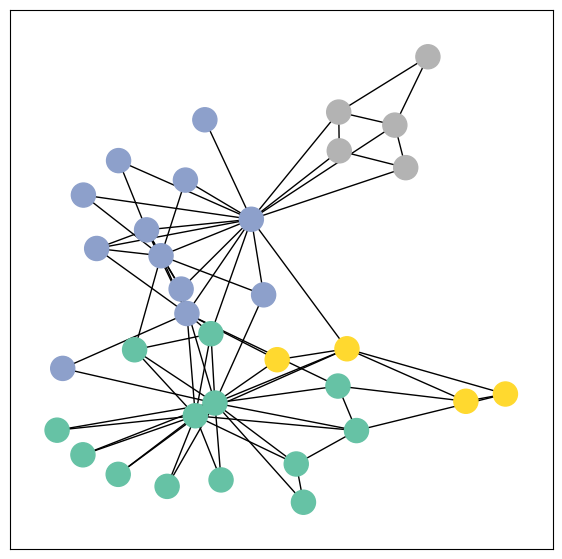

In [6]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualizeGraph(G, color=data.y)

# Define GCN Class
This code defines a Graph Convolutional Network (GCN) model using PyTorch and PyTorch Geometric. Here is an explanation of the code:

1. **Imports**:
   - `torch` for the main PyTorch library.
   - `Linear` from `torch.nn` for the linear layer.
   - `GCNConv` from `torch_geometric.nn` for the graph convolutional layers.

2. **GCN Class Definition**:
   - The `GCN` class inherits from `torch.nn.Module`.
   - The `__init__` method initializes the model:
     - Sets a manual seed for reproducibility.
     - Defines three graph convolutional layers (`conv1`, `conv2`, `conv3`), with input and output dimensions:
       - `conv1`: from the number of features in the dataset to 4.
       - `conv2`: from 4 to 4.
       - `conv3`: from 4 to 2.
     - Defines a linear classifier layer (`classifier`) that maps from 2-dimensional input to the number of classes in the dataset.
   - The `forward` method defines the forward pass of the model:
     - Applies the first graph convolutional layer and applies the `tanh` activation function.
     - Applies the second graph convolutional layer and applies the `tanh` activation function.
     - Applies the third graph convolutional layer and applies the `tanh` activation function.
     - Applies the linear classifier to the output of the third graph convolutional layer.

3. **Model Initialization**:
   - An instance of the `GCN` class is created and printed.

--------------------
이 코드는 PyTorch 및 PyTorch Geometric을 사용하여 그래프 컨볼루션 네트워크(GCN) 모델을 정의한 것이다. 코드에 대한 설명은 다음과 같다:

1. **임포트**:
   - PyTorch의 주요 라이브러리인 `torch`.
   - 선형 계층을 위한 `torch.nn`의 `Linear`.
   - 그래프 컨볼루션 계층을 위한 `torch_geometric.nn`의 `GCNConv`.

2. **GCN 클래스 정의**:
   - `GCN` 클래스는 `torch.nn.Module`을 상속한다.
   - `__init__` 메서드는 모델을 초기화한다:
     - 재현성을 위해 시드를 수동으로 설정한다.
     - 세 개의 그래프 컨볼루션 계층(`conv1`, `conv2`, `conv3`)을 정의하고, 입력 및 출력 차원을 지정한다:
       - `conv1`: 데이터셋의 특징 수에서 4로 변환.
       - `conv2`: 4에서 4로 변환.
       - `conv3`: 4에서 2로 변환.
     - 2차원 입력을 데이터셋의 클래스 수로 매핑하는 선형 분류기 계층(`classifier`)을 정의한다.
   - `forward` 메서드는 모델의 순전파를 정의한다:
     - 첫 번째 그래프 컨볼루션 계층을 적용하고 `tanh` 활성화 함수를 적용한다.
     - 두 번째 그래프 컨볼루션 계층을 적용하고 `tanh` 활성화 함수를 적용한다.
     - 세 번째 그래프 컨볼루션 계층을 적용하고 `tanh` 활성화 함수를 적용한다.
     - 세 번째 그래프 컨볼루션 계층의 출력에 선형 분류기를 적용한다.

3. **모델 초기화**:
   - `GCN` 클래스의 인스턴스를 생성하고 출력한다.

In [7]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(1234)
    self.conv1 = GCNConv(dataset.num_features, 4)
    self.conv2 = GCNConv(4, 4)
    self.conv3 = GCNConv(4, 2)
    self.classifier = Linear(2, dataset.num_classes)

  def forward(self, x, edge_index):
    h = self.conv1(x, edge_index)
    h = h.tanh()
    h = self.conv2(h, edge_index)
    h = h.tanh()
    h = self.conv3(h, edge_index)
    h = h.tanh()

    out = self.classifier(h)
    return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


# Defind the model

Embedding shape: [34, 2]


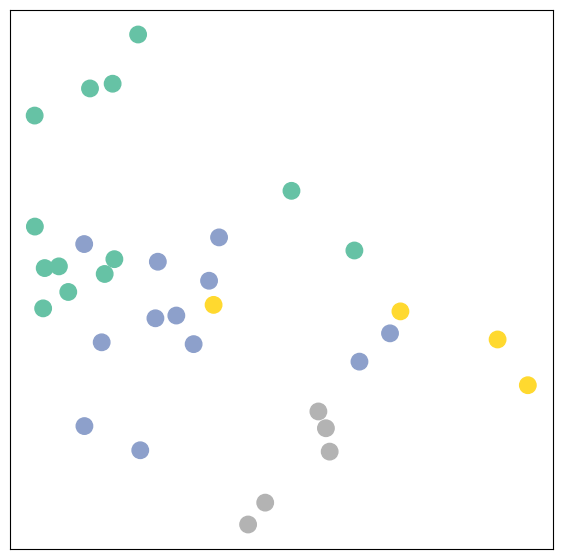

In [8]:
model = GCN()
_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')
visualizeEmbedding(h, color=data.y)

## `train` function
This code trains a Graph Convolutional Network (GCN) on the Karate Club dataset using PyTorch and PyTorch Geometric. The training process is visualized every 50 epochs. Here is an explanation of the code:

1. **Imports**:
   - `time` for adding sleep intervals between visualizations.
   - `Javascript` and `display` from `IPython.display` for adjusting the iframe height in Google Colab.

2. **Adjusting Iframe Height**:
   - A script is executed to set the iframe height in Google Colab, ensuring the output is displayed correctly.

3. **Model, Loss Function, and Optimizer Initialization**:
   - An instance of the `GCN` model is created.
   - The cross-entropy loss function (`torch.nn.CrossEntropyLoss`) is used.
   - The Adam optimizer (`torch.optim.Adam`) is used with a learning rate of 0.01.

4. **Training Function**:
   - The `train` function performs a single training step:
     - The optimizer gradients are reset.
     - The model performs a forward pass to compute the output and hidden embeddings.
     - The loss is computed using the cross-entropy loss function on the training nodes.
     - The loss is backpropagated, and the optimizer performs a step to update the model parameters.
     - The function returns the loss and hidden embeddings.

5. **Training Loop**:
   - The model is trained for 401 epochs.
   - Every 50 epochs, the embeddings are visualized using the `visualizeEmbedding` function, displaying the embeddings and training loss.
   - A 0.3-second sleep interval is added to manage the visualization update timing.

-----------------------------------
이 코드는 PyTorch 및 PyTorch Geometric을 사용하여 Karate Club 데이터셋에서 그래프 컨볼루션 네트워크(GCN)를 학습시키며, 학습 과정을 매 50 에포크마다 시각화한다. 코드에 대한 설명은 다음과 같다:

1. **임포트**:
   - 시각화 간 간격을 추가하기 위해 `time` 모듈을 임포트한다.
   - Google Colab에서 iframe 높이를 조정하기 위해 `IPython.display`의 `Javascript`와 `display`를 임포트한다.

2. **Iframe 높이 조정**:
   - Google Colab에서 출력이 올바르게 표시되도록 iframe 높이를 설정하는 스크립트를 실행한다.

3. **모델, 손실 함수, 옵티마이저 초기화**:
   - `GCN` 모델의 인스턴스를 생성한다.
   - 교차 엔트로피 손실 함수(`torch.nn.CrossEntropyLoss`)를 사용한다.
   - 학습률 0.01로 Adam 옵티마이저(`torch.optim.Adam`)를 사용한다.

4. **훈련 함수**:
   - `train` 함수는 단일 훈련 단계를 수행한다:
     - 옵티마이저의 그래디언트를 초기화한다.
     - 모델이 순전파를 수행하여 출력과 히든 임베딩을 계산한다.
     - 훈련 노드에서 교차 엔트로피 손실 함수를 사용하여 손실을 계산한다.
     - 손실을 역전파하고 옵티마이저가 한 단계 진행하여 모델 파라미터를 업데이트한다.
     - 함수는 손실과 히든 임베딩을 반환한다.

5. **훈련 루프**:
   - 모델을 401 에포크 동안 학습시킨다.
   - 매 50 에포크마다 `visualizeEmbedding` 함수를 사용하여 임베딩을 시각화하고 학습 손실을 표시한다.
   - 시각화 업데이트 타이밍을 관리하기 위해 0.3초의 슬립 간격을 추가한다.


<IPython.core.display.Javascript object>

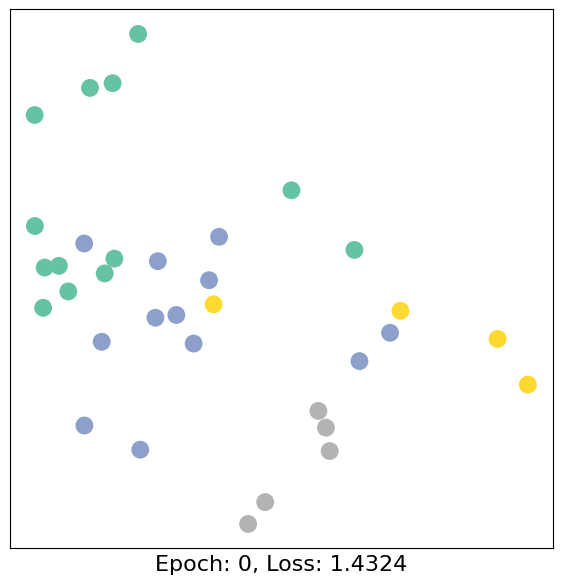

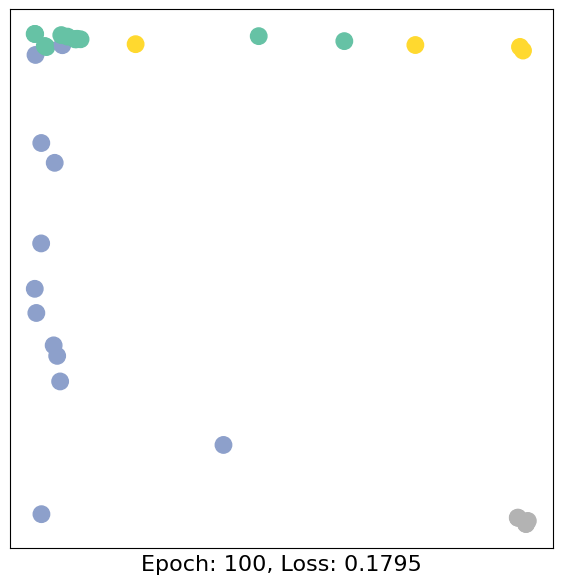

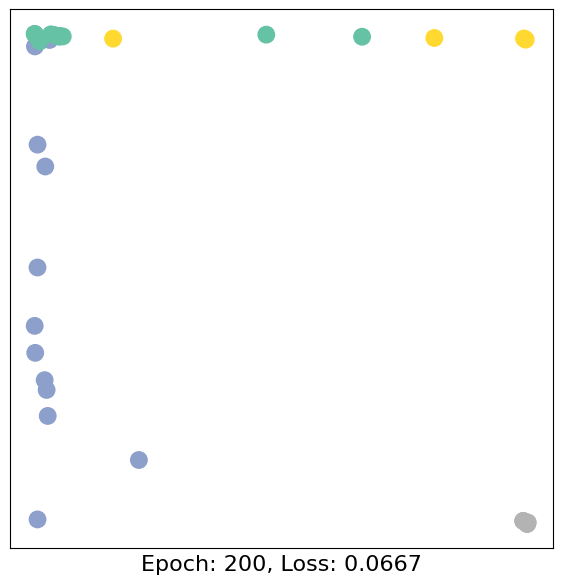

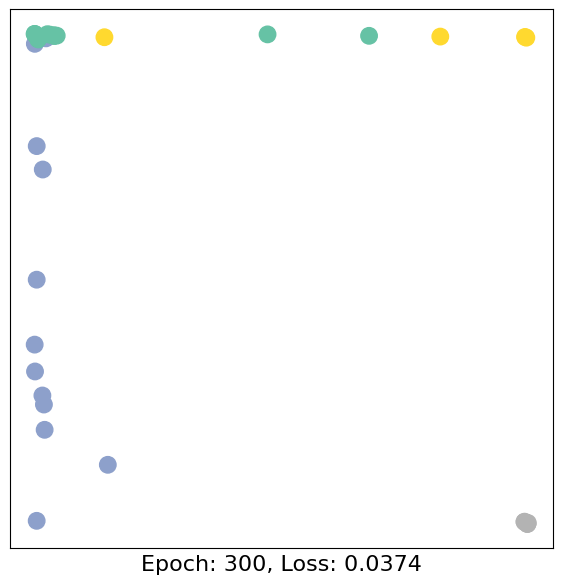

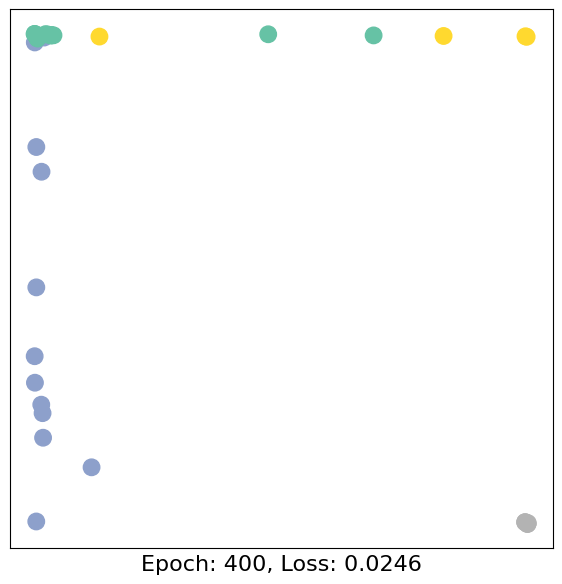

In [9]:
import time
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))
model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(data):
  optimizer.zero_grad()
  out, h = model(data.x, data.edge_index)
  loss = criterion(out[data.train_mask], data.y[data.train_mask])
  loss.backward()
  optimizer.step()
  return loss, h

for epoch in range(401):
  loss, h = train(data)
  if epoch % 100 == 0:
    visualizeEmbedding(h, color=data.y, epoch=epoch, loss=loss)
    time.sleep(0.3)

This code defines a function to visualize high-dimensional data using t-SNE and Matplotlib. Here is an explanation of the code:

**Imports**:
   - `%matplotlib inline` to enable inline plotting with Matplotlib in Jupyter notebooks.
   - `matplotlib.pyplot` as `plt` for plotting.
   - `TSNE` from `sklearn.manifold` for dimensionality reduction.

**t-SNE**:
   - t-SNE (t-distributed Stochastic Neighbor Embedding) is a machine learning algorithm for dimensionality reduction. It is particularly well-suited for visualizing high-dimensional datasets by reducing them to two or three dimensions while preserving the structure and relationships between data points as much as possible.

**Visualization Function**:
   - `visualize(h, color)` function:
     - Uses t-SNE to reduce the dimensionality of the high-dimensional tensor `h` to 2D.
     - Plots the 2D data using Matplotlib.
     - Sets the figure size to 10x10 inches.
     - Removes the x and y ticks from the plot.
     - Plots the reduced data as a scatter plot with points colored according to the `color` parameter, using the "Set2" colormap.

---------------------

이 코드는 t-SNE와 Matplotlib을 사용하여 고차원 데이터를 시각화하는 함수를 정의한 것이다. 코드에 대한 설명은 다음과 같다:

**임포트**:
   - `%matplotlib inline`은 Jupyter 노트북에서 Matplotlib을 사용하여 인라인 플롯팅을 가능하게 한다.
   - 플롯팅을 위해 `matplotlib.pyplot`을 `plt`로 임포트한다.
   - 차원 축소를 위해 `sklearn.manifold`의 `TSNE`를 임포트한다.

**t-SNE**:
   - t-SNE (t-distributed Stochastic Neighbor Embedding)은 차원 축소를 위한 기계 학습 알고리즘이다. 특히 고차원 데이터셋을 2차원 또는 3차원으로 축소하여 데이터 포인트 간의 구조와 관계를 최대한 유지하면서 시각화하는 데 적합하다.

**시각화 함수**:
   - `visualize(h, color)` 함수:
     - t-SNE를 사용하여 고차원 텐서 `h`의 차원을 2D로 축소한다.
     - Matplotlib을 사용하여 2D 데이터를 플로팅한다.
     - 그림 크기를 10x10 인치로 설정한다.
     - 플롯에서 x와 y 틱을 제거한다.
     - "Set2" 컬러맵을 사용하여 `color` 매개변수에 따라 점의 색상을 지정하여 축소된 데이터를 산점도로 플로팅한다.


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
  z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
  plt.figure(figsize=(10,10))
  plt.xticks=([])
  plt.yticks=([])
  plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
  plt.show()

In [11]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}')
print('='*20)
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]
print()
print(data)
print('='*40)

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loop: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'len(x): {len(data.x)}, len(x[0]): {len(data.x[0])}')


Dataset: Cora()
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loop: False
Is undirected: True
len(x): 2708, len(x[0]): 1433


Processing...
Done!


# MLP
This code defines a Multi-Layer Perceptron (MLP) model using PyTorch. Here is an explanation of the code:

**Imports**:
   - `torch` for the main PyTorch library.
   - `Linear` from `torch.nn` for the linear layers.
   - `F` from `torch.nn.functional` for the dropout and activation functions.

**MLP Class Definition**:
   - The `MLP` class inherits from `torch.nn.Module`.
   - The `__init__` method initializes the model:
     - Sets a manual seed for reproducibility.
     - Defines two linear layers (`lin1`, `lin2`):
       - `lin1`: from the number of features in the dataset to the specified number of hidden channels.
       - `lin2`: from the number of hidden channels to the number of classes in the dataset.
   - The `forward` method defines the forward pass of the model:
     - Applies the first linear layer and the ReLU activation function.
     - Applies dropout with a probability of 0.5 during training.
     - Applies the second linear layer to produce the output.

**Model Initialization**:
   - An instance of the `MLP` class is created with 16 hidden channels and printed.

---------------------

이 코드는 PyTorch를 사용하여 다층 퍼셉트론(MLP) 모델을 정의한 것이다. 코드에 대한 설명은 다음과 같다:

**임포트**:
   - PyTorch의 주요 라이브러리인 `torch`.
   - 선형 계층을 위한 `torch.nn`의 `Linear`.
   - 드롭아웃 및 활성화 함수를 위한 `torch.nn.functional`의 `F`.

**MLP 클래스 정의**:
   - `MLP` 클래스는 `torch.nn.Module`을 상속한다.
   - `__init__` 메서드는 모델을 초기화한다:
     - 재현성을 위해 시드를 수동으로 설정한다.
     - 두 개의 선형 계층(`lin1`, `lin2`)을 정의한다:
       - `lin1`: 데이터셋의 특징 수에서 지정된 숨겨진 채널 수로 변환.
       - `lin2`: 숨겨진 채널 수에서 데이터셋의 클래스 수로 변환.
   - `forward` 메서드는 모델의 순전파를 정의한다:
     - 첫 번째 선형 계층과 ReLU 활성화 함수를 적용한다.
     - 훈련 중일 때 0.5의 확률로 드롭아웃을 적용한다.
     - 두 번째 선형 계층을 적용하여 출력을 생성한다.

**모델 초기화**:
   - 16개의 숨겨진 채널로 `MLP` 클래스의 인스턴스를 생성하고 출력한다.


In [12]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

class MLP(torch.nn.Module):
  def __init__(self, hidden_channels):
    super().__init__()
    torch.manual_seed(12345)
    self.lin1 = Linear(dataset.num_features, hidden_channels)
    self.lin2 = Linear(hidden_channels, dataset.num_classes)

  def forward(self, x):
    x = self.lin1(x)
    x = x.relu()
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.lin2(x)
    return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


In [13]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
  model.train()
  optimizer.zero_grad()
  out = model(data.x)
  loss = criterion(out[data.train_mask], data.y[data.train_mask])
  loss.backward()
  optimizer.step()
  return loss

def test():
  model.eval()
  out = model(data.x)
  pred = out.argmax(dim=1)
  testCorrect = pred[data.test_mask] == data.y[data.test_mask]
  testAcc = int(testCorrect.sum()) / int(data.test_mask.sum())
  return testAcc

for epoch in range(1, 401):
  loss = train()
  print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9615
Epoch: 002, Loss: 1.9557
Epoch: 003, Loss: 1.9505
Epoch: 004, Loss: 1.9423
Epoch: 005, Loss: 1.9327
Epoch: 006, Loss: 1.9279
Epoch: 007, Loss: 1.9144
Epoch: 008, Loss: 1.9087
Epoch: 009, Loss: 1.9023
Epoch: 010, Loss: 1.8893
Epoch: 011, Loss: 1.8776
Epoch: 012, Loss: 1.8594
Epoch: 013, Loss: 1.8457
Epoch: 014, Loss: 1.8365
Epoch: 015, Loss: 1.8280
Epoch: 016, Loss: 1.7965
Epoch: 017, Loss: 1.7984
Epoch: 018, Loss: 1.7832
Epoch: 019, Loss: 1.7495
Epoch: 020, Loss: 1.7441
Epoch: 021, Loss: 1.7188
Epoch: 022, Loss: 1.7124
Epoch: 023, Loss: 1.6785
Epoch: 024, Loss: 1.6660
Epoch: 025, Loss: 1.6119
Epoch: 026, Loss: 1.6236
Epoch: 027, Loss: 1.5827
Epoch: 028, Loss: 1.5784
Epoch: 029, Loss: 1.5524
Epoch: 030, Loss: 1.5020
Epoch: 031, Loss: 1.5065
Epoch: 032, Loss: 1.4742
Epoch: 033, Loss: 1.4581
Epoch: 034, Loss: 1.4246
Epoch: 035, Loss: 1.4131
Epoch: 036, Loss: 1.4112
Epoch: 037, Loss: 1.3923
Epoch: 038, Loss: 1.3055
Epoch: 039, Loss: 1.2982
Epoch: 040, Loss: 1.2543


In [14]:
testAcc = test()
print(f'Test Accuracy: {testAcc:.4f}')

Test Accuracy: 0.5920


# 2-layer GCN

In [15]:
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
  def __init__(self, hidden_channels=16):
    super().__init__()
    torch.manual_seed(1234567)
    self.conv1 = GCNConv(dataset.num_features, hidden_channels)
    self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

  def forward(self, x, edge_index):
    x = self.conv1(x, edge_index)
    x = x.relu()
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.conv2(x, edge_index)
    return x

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


torch.Size([2708, 7])


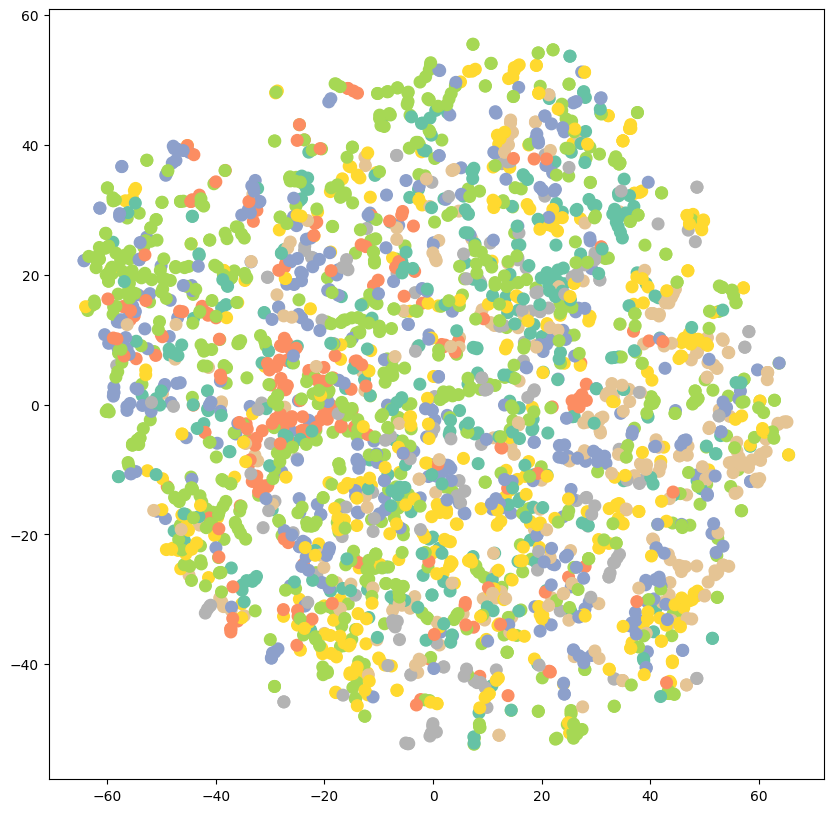

In [16]:
model = GCN()
model.eval()
out = model(data.x, data.edge_index)
print(out.shape)
visualize(out, color=data.y)

In [17]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
  model.train()
  optimizer.zero_grad()
  out = model(data.x, data.edge_index)
  loss = criterion(out[data.train_mask], data.y[data.train_mask])
  loss.backward()
  optimizer.step()
  return loss

def test():
  model.eval()
  out = model(data.x, data.edge_index)
  pred = out.argmax(dim=1)
  testCorrect = data.y[data.test_mask] == pred[data.test_mask]
  testAcc = int(testCorrect.sum()) / int(data.test_mask.sum())
  return testAcc

for epoch in range(1, 401):
  loss = train()
  print(f'Epoch: {epoch:3d}, Loss: {loss:.4f}')


<IPython.core.display.Javascript object>

Epoch:   1, Loss: 1.9463
Epoch:   2, Loss: 1.9409
Epoch:   3, Loss: 1.9343
Epoch:   4, Loss: 1.9275
Epoch:   5, Loss: 1.9181
Epoch:   6, Loss: 1.9086
Epoch:   7, Loss: 1.9015
Epoch:   8, Loss: 1.8933
Epoch:   9, Loss: 1.8808
Epoch:  10, Loss: 1.8685
Epoch:  11, Loss: 1.8598
Epoch:  12, Loss: 1.8482
Epoch:  13, Loss: 1.8290
Epoch:  14, Loss: 1.8233
Epoch:  15, Loss: 1.8057
Epoch:  16, Loss: 1.7966
Epoch:  17, Loss: 1.7825
Epoch:  18, Loss: 1.7617
Epoch:  19, Loss: 1.7491
Epoch:  20, Loss: 1.7310
Epoch:  21, Loss: 1.7147
Epoch:  22, Loss: 1.7056
Epoch:  23, Loss: 1.6954
Epoch:  24, Loss: 1.6697
Epoch:  25, Loss: 1.6538
Epoch:  26, Loss: 1.6312
Epoch:  27, Loss: 1.6161
Epoch:  28, Loss: 1.5899
Epoch:  29, Loss: 1.5711
Epoch:  30, Loss: 1.5576
Epoch:  31, Loss: 1.5393
Epoch:  32, Loss: 1.5137
Epoch:  33, Loss: 1.4948
Epoch:  34, Loss: 1.4913
Epoch:  35, Loss: 1.4698
Epoch:  36, Loss: 1.3998
Epoch:  37, Loss: 1.4041
Epoch:  38, Loss: 1.3761
Epoch:  39, Loss: 1.3631
Epoch:  40, Loss: 1.3258


In [18]:
testAcc = test()
print(f'Test Accuracy: {testAcc:.4f}')

Test Accuracy: 0.8060


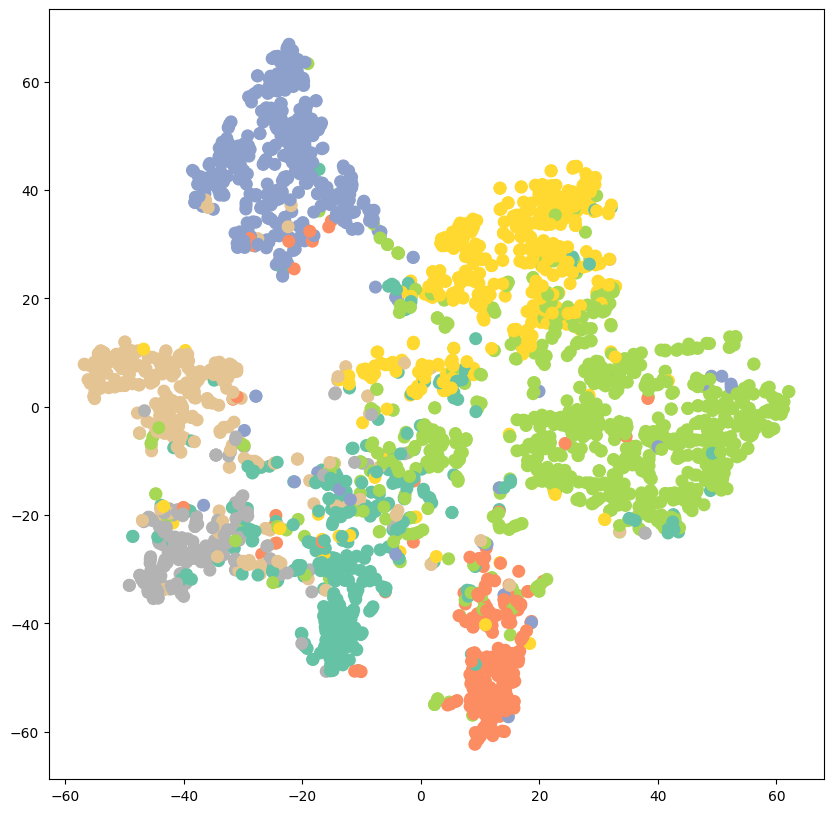

In [19]:
model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)